In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [3]:
df = pd.read_csv("results.csv")
df = df.loc[:, (df != df.iloc[0]).any()] 

Create full table with MultiIndexes

In [4]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "bnn_structure", "dropout", "epochs", "vip_layers", ]).agg(["mean", std]).drop("split", axis = 1)
full_df

LOSS  \
                                                                  mean   
dataset_name bnn_structure dropout epochs vip_layers                     
boston       [10, 10]      0.1     30000  [1, 1, 1, 1, 1]   505.489511   
                                          [1, 1, 1, 1]      322.440714   
                                          [1, 1, 1]         330.900671   
                                          [1, 1]            321.105300   
                                          [1]               325.546046   
                                          [2]               422.001564   
                                          [3]               368.351441   
                                          [4]               385.773957   
                                          [5]               373.950489   
                                   40000  [1]               332.689551   
                                          [2]               472.408446   
                                          [3]               403.549178   
                                          [4]               406.172439   
                                          [5]               372.693174   
                           0.2     40000  [1]               277.834038   
                                          [2]               352.053651   
                                          [3]               274.230869   
                                          [4]               289.504420   
                                          [5]               294.765615   
             [10]          0.1     30000  [1, 1, 1, 1, 1]   326.648903   
                                          [1, 1, 1, 1]      339.922741   
                                          [1, 1, 1]         409.381255   
                                          [1, 1]            360.128582   
                                          [1]               393.114117   
                                          [2]               522.393749   
                                          [3]               445.482330   
                                          [4]               465.080885   
                                          [5]               390.145364   
                                   40000  [1]               415.977026   
                                          [2]               568.075084   
                                          [3]               563.702078   
                                          [4]               480.410429   
                                          [5]               426.383122   
             [200, 200]    0.1     30000  [1]              3646.467975   
energy       [10, 10]      0.1     30000  [1]              -860.448868   
                                          [2]              -828.797119   
                                          [3]              -770.499106   
                                          [4]              -709.467978   
                                          [5]              -660.873846   
                                   40000  [1]              -885.774432   
                                          [2]              -860.168585   
                                          [3]              -820.377109   
                                          [4]              -785.543265   
                                          [5]              -739.915039   
                           0.2     40000  [1]              -769.016333   
                                          [2]              -776.385492   
                                          [3]              -667.092148   
                                          [4]              -624.841293   
                                          [5]              -579.458997   
             [10]          0.1     30000  [1]              -880.147775   
                                          [2]              -856.381302   
                                          [3]              -805.174597

For now, we are plotting just the mean values. Create a new dataframe using just the mean.

In [5]:
df = df.groupby(["dataset_name", "bnn_structure", "dropout", "epochs", "vip_layers"]).mean()

# RMSE

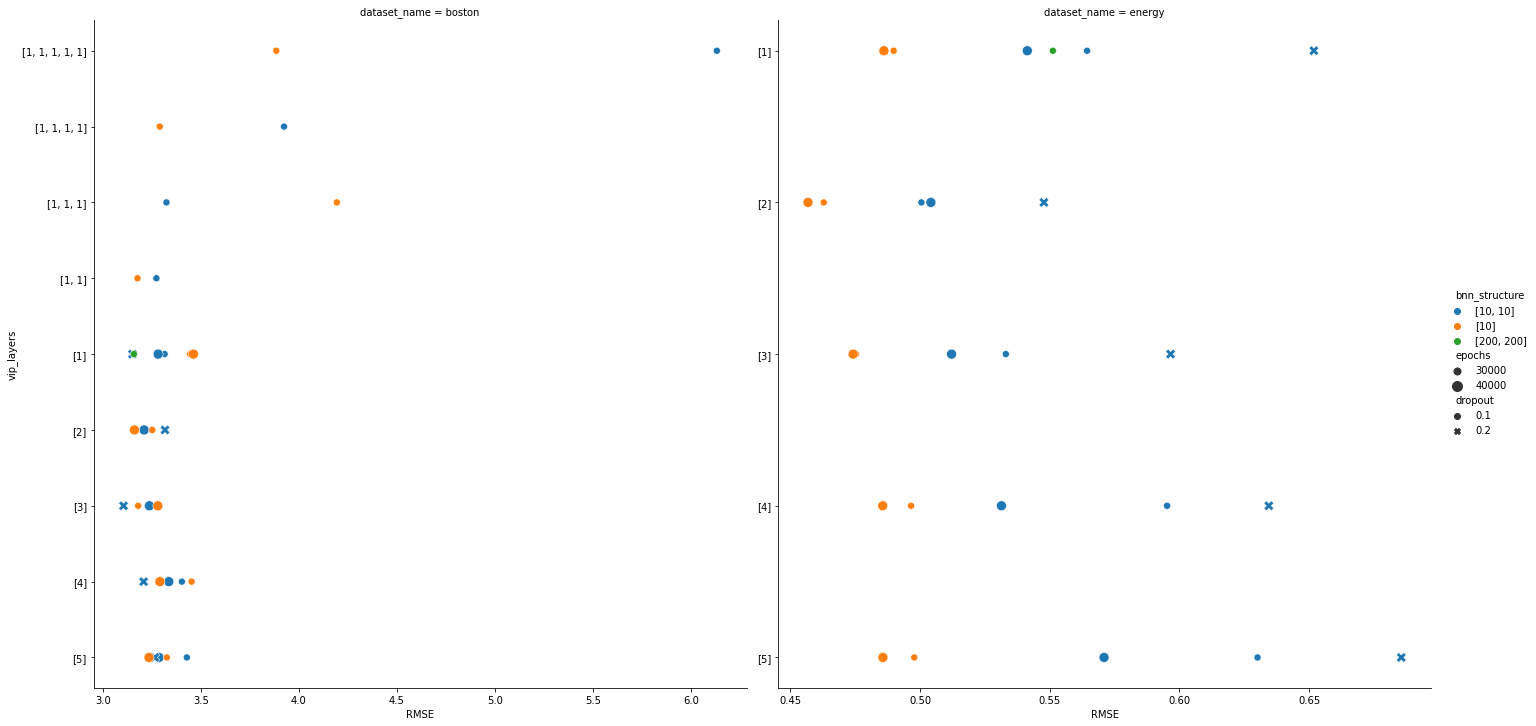

In [6]:
sns.relplot(
    data=df, x="RMSE", y="vip_layers",
    col="dataset_name", hue="bnn_structure", style="dropout",
    kind="scatter", height = 10, facet_kws={'sharey': False, 'sharex': False}, 
    size = "epochs", sizes = (50, 100)
)
plt.show()

# NLL

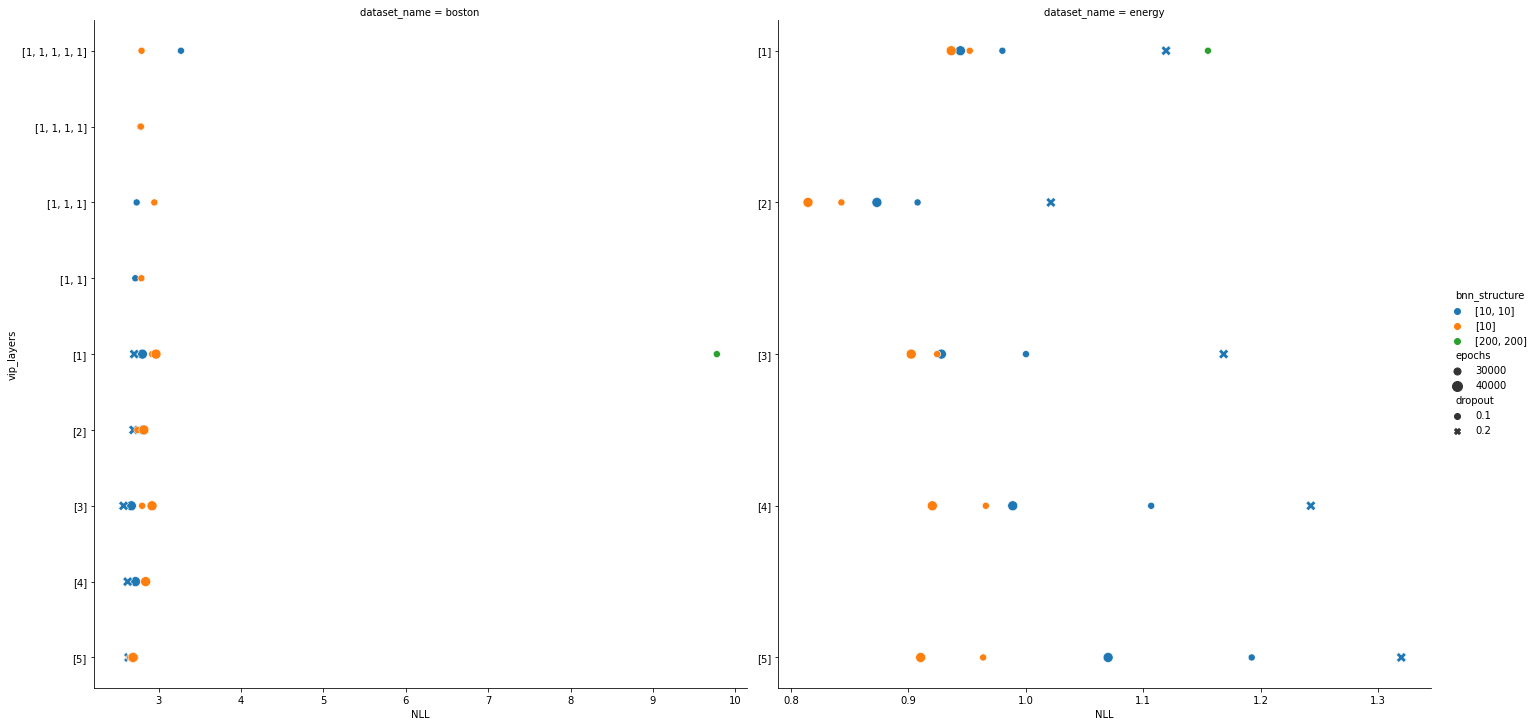

In [7]:
sns.relplot(
    data=df, x="NLL", y="vip_layers",
    col="dataset_name", hue="bnn_structure", style="dropout",
    kind="scatter", height = 10, facet_kws={'sharey': False, 'sharex': False}, 
    size = "epochs", sizes = (50, 100)
)
plt.show()

Let us drop the outliers in order to enhance visibility. In the RMSE we are dropping the results for 5 layers of outoput_dim 1.

In [8]:
df_aux = df.drop('[1, 1, 1, 1, 1]', level= "vip_layers")

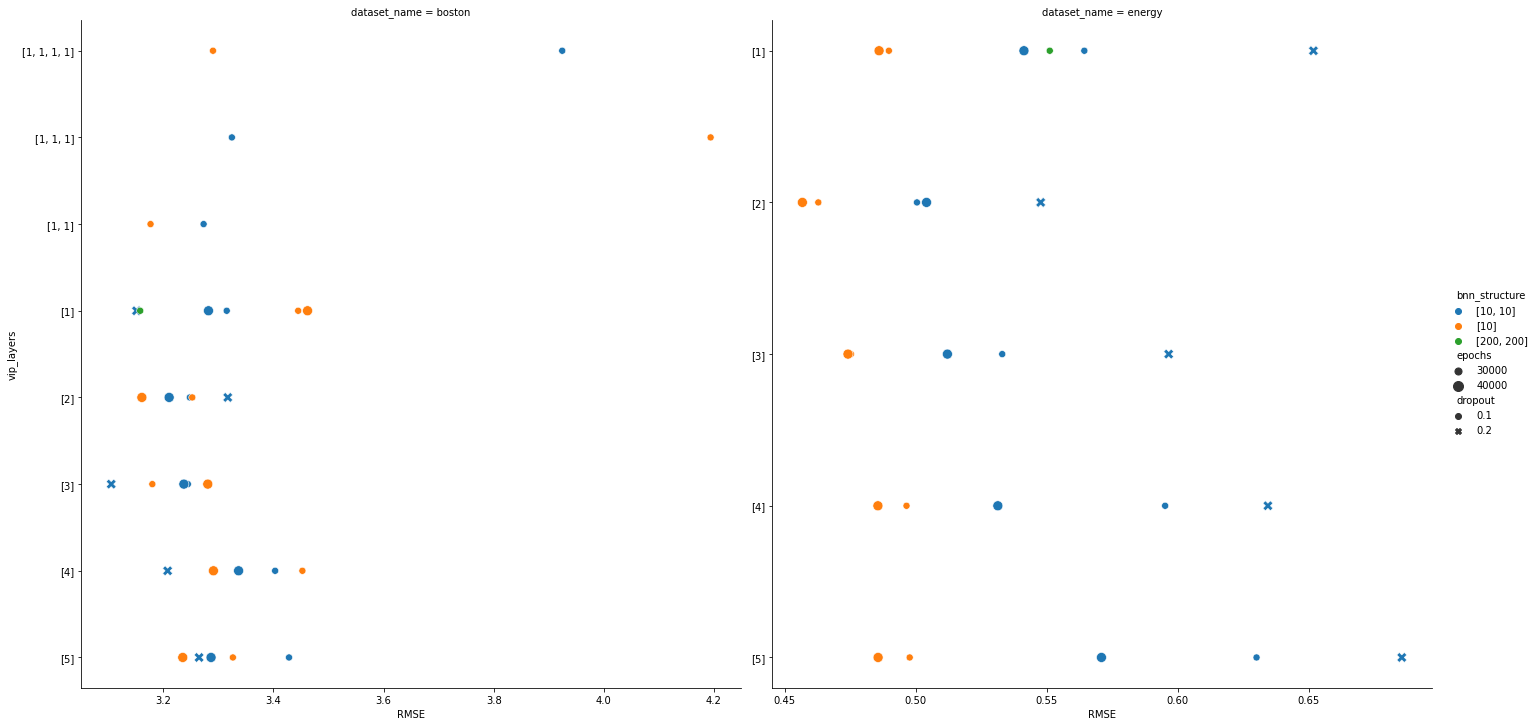

In [9]:
sns.relplot(
    data=df_aux, x="RMSE", y="vip_layers",
    col="dataset_name", hue="bnn_structure", style="dropout",
    kind="scatter", height = 10, facet_kws={'sharey': False, 'sharex': False}, 
    size = "epochs", sizes = (50, 100)
)
plt.show()

On the other hand, for the NLL, we are dropping the experiment with bnn [200, 200]

In [10]:
df_aux = df.drop('[200, 200]', level= "bnn_structure")

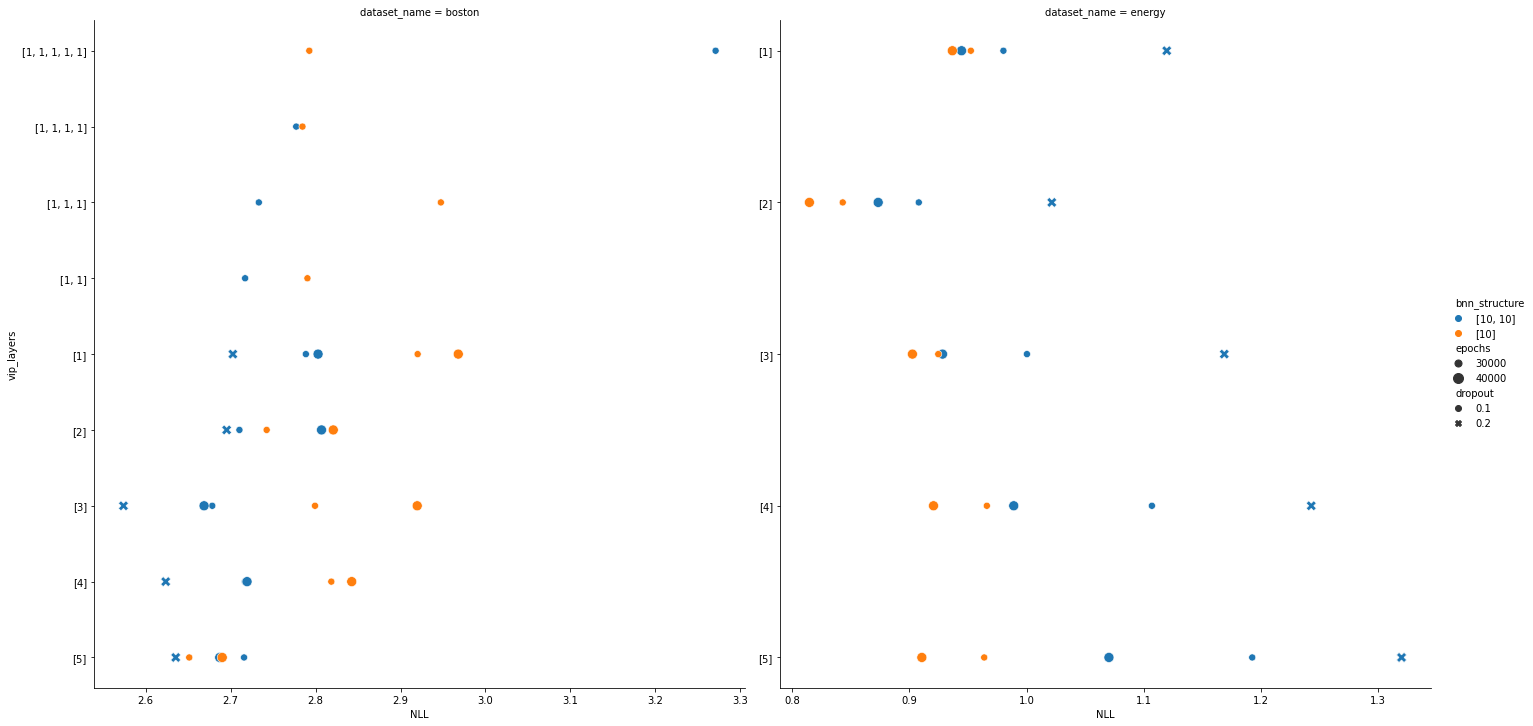

In [11]:
sns.relplot(
    data=df_aux, x="NLL", y="vip_layers",
    col="dataset_name", hue="bnn_structure", style="dropout",
    kind="scatter", height = 10, facet_kws={'sharey': False, 'sharex': False}, 
    size = "epochs", sizes = (50, 100)
)
plt.show()

In [44]:
def comparative_plot(model_names, mean_values, std_values, colors, ax,):
    ax.scatter(mean_values, model_names, c = colors)
    ax.hlines(model_names, mean_values - std_values, mean_values + std_values, colors = colors)
    ax.axvline(mean_values[0], linestyle = "dashed", color = "k")

In [45]:
dropout = 0.1
epochs = 30000
bnn_structure = "[10, 10]"
vip_layers = ["[1]", "[2]", "[3]", "[4]", "[5]"]


In [46]:
aux_df = full_df.query("dropout == @dropout and epochs == @epochs and bnn_structure == @bnn_structure and vip_layers in @vip_layers")

In [47]:
boston = aux_df.query("dataset_name == 'boston'")
energy = aux_df.query("dataset_name == 'energy'")
boston

LOSS             \
                                                            mean        std   
dataset_name bnn_structure dropout epochs vip_layers                          
boston       [10, 10]      0.1     30000  [1]         325.546046  45.568050   
                                          [2]         422.001564  68.188666   
                                          [3]         368.351441  53.285092   
                                          [4]         385.773957  53.088973   
                                          [5]         373.950489  47.604226   

                                                          RMSE            \
                                                          mean       std   
dataset_name bnn_structure dropout epochs vip_layers                       
boston       [10, 10]      0.1     30000  [1]         3.315125  0.156025   
                                          [2]         3.248169  0.189739   
                                          [3]         3.244548  0.181385   
                                          [4]         3.403049  0.180888   
                                          [5]         3.428282  0.176571   

                                                           NLL            \
                                                          mean       std   
dataset_name bnn_structure dropout epochs vip_layers                       
boston       [10, 10]      0.1     30000  [1]         2.788524  0.095946   
                                          [2]         2.710307  0.107240   
                                          [3]         2.678321  0.090330   
                                          [4]         2.716789  0.091547   
                                          [5]         2.715742  0.083904   

                                                          CRPS            
                                                          mean       std  
dataset_name bnn_structure dropout epochs vip_layers                      
boston       [10, 10]      0.1     30000  [1]         4.752958  0.130474  
                                          [2]         4.748915  0.129534  
                                          [3]         4.747824  0.129321  
                                          [4]         4.750190  0.129127  
                                          [5]         4.752076  0.129649

In [48]:
energy

LOSS            \
                                                            mean       std   
dataset_name bnn_structure dropout epochs vip_layers                         
energy       [10, 10]      0.1     30000  [1]        -860.448868  9.840702   
                                          [2]        -828.797119  9.173951   
                                          [3]        -770.499106  5.996298   
                                          [4]        -709.467978  7.416120   
                                          [5]        -660.873846  7.412825   

                                                          RMSE            \
                                                          mean       std   
dataset_name bnn_structure dropout epochs vip_layers                       
energy       [10, 10]      0.1     30000  [1]         0.564388  0.017187   
                                          [2]         0.500529  0.014034   
                                          [3]         0.533059  0.012161   
                                          [4]         0.595220  0.014381   
                                          [5]         0.630097  0.017321   

                                                           NLL            \
                                                          mean       std   
dataset_name bnn_structure dropout epochs vip_layers                       
energy       [10, 10]      0.1     30000  [1]         0.980149  0.013930   
                                          [2]         0.907921  0.011940   
                                          [3]         1.000223  0.008466   
                                          [4]         1.106862  0.010423   
                                          [5]         1.192463  0.010890   

                                                          CRPS            
                                                          mean       std  
dataset_name bnn_structure dropout epochs vip_layers                      
energy       [10, 10]      0.1     30000  [1]         5.632533  0.064330  
                                          [2]         5.629906  0.064422  
                                          [3]         5.630438  0.064376  
                                          [4]         5.631182  0.064376  
                                          [5]         5.632383  0.064389

In [49]:
df_200 =  full_df.query("dropout == @dropout and epochs == @epochs and bnn_structure == '[200, 200]' and vip_layers in @vip_layers")
boston_200 = df_200.query("dataset_name == 'boston'")
energy_200 = df_200.query("dataset_name == 'energy'")

In [50]:
models = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "VIP 200", "DGP", "DGP-2", "DGP-3", "DGP-4", "DGP-5"]
means = np.concatenate([boston.xs(('RMSE', 'mean'),axis=1).to_numpy(),  boston_200.xs(('RMSE', 'mean'),axis=1).to_numpy()])
stds = np.concatenate([boston.xs(('RMSE', 'std'),axis=1).to_numpy(),  boston_200.xs(('RMSE', 'std'),axis=1).to_numpy()])

In [51]:
doubly = pd.read_csv("doubly.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE          
                    mean       std      mean       std
dataset layers                                        
boston  1       2.613565  0.056845  3.432719  0.166433
        2       2.625892  0.056571  3.500948  0.171084
        3       2.621380  0.055142  3.494207  0.173633
        4       2.622479  0.054144  3.502288  0.175309
        5       2.626873  0.054583  3.527451  0.180719

In [52]:
np.concatenate([boston.xs(('RMSE', 'mean'),axis=1).to_numpy(),  boston_200.xs(('RMSE', 'mean'),axis=1).to_numpy(), doubly.xs(('RMSE', 'mean'),axis=1).to_numpy(),])

array([3.31512494, 3.24816893, 3.24454817, 3.40304925, 3.42828154,
       3.15797834, 3.43271903, 3.50094806, 3.4942065 , 3.50228796,
       3.52745057])

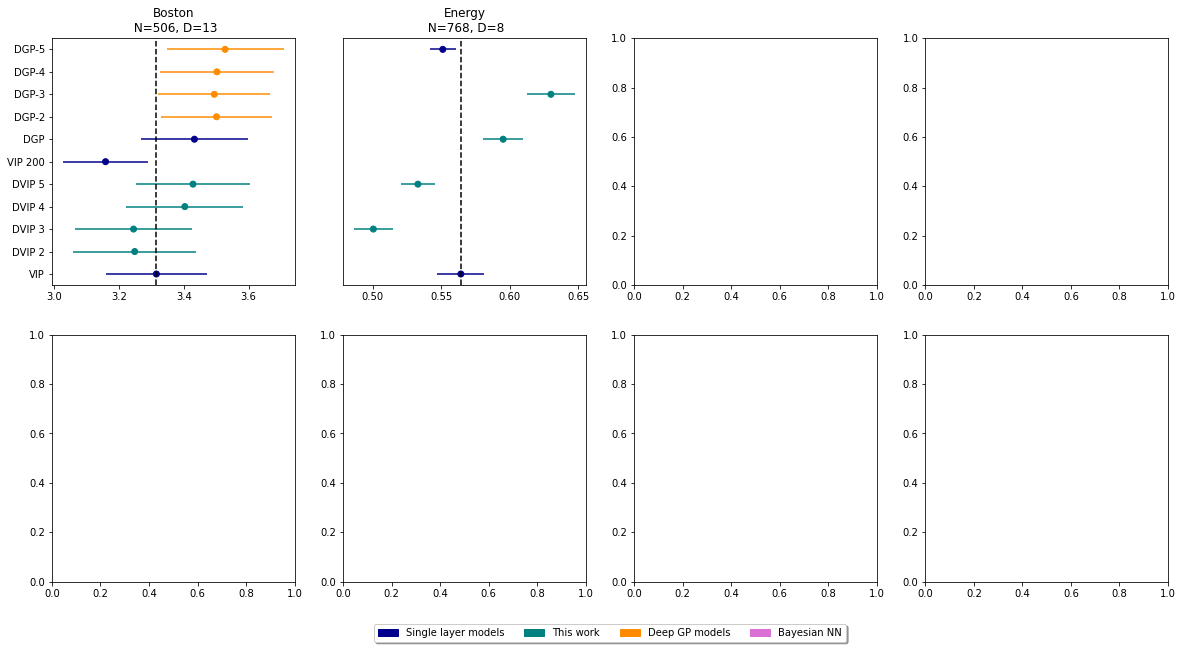

In [58]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
comparative_plot(models, 
                 np.concatenate([boston.xs(('RMSE', 'mean'),axis=1).to_numpy(),  boston_200.xs(('RMSE', 'mean'),axis=1).to_numpy(), doubly.xs(('RMSE', 'mean'),axis=1).to_numpy(),]),
                 np.concatenate([boston.xs(('RMSE', 'std'),axis=1).to_numpy(),  boston_200.xs(('RMSE', 'std'),axis=1).to_numpy(), doubly.xs(('RMSE', 'std'),axis=1).to_numpy(),]),
                 ["darkblue", "teal", "teal", "teal", "teal", "darkblue", "darkblue", "darkorange", "darkorange", "darkorange", "darkorange"],
                 ax[0][0])
ax[0][0].set_title("Boston\n N=506, D=13")
ax[0][0].locator_params(axis="x", nbins=4)
comparative_plot(models[:6], 
                 np.concatenate([energy.xs(('RMSE', 'mean'),axis=1).to_numpy(),  energy_200.xs(('RMSE', 'mean'),axis=1).to_numpy()]),
                 np.concatenate([energy.xs(('RMSE', 'std'),axis=1).to_numpy(),  energy_200.xs(('RMSE', 'std'),axis=1).to_numpy()]),
                 ["darkblue", "teal", "teal", "teal", "teal", "darkblue"],
                 ax[0][1])
ax[0][1].yaxis.set_ticklabels([])
ax[0][1].tick_params(left = False)
ax[0][1].set_title("Energy\n N=768, D=8")
ax[0][1].locator_params(axis="x", nbins=4)

handles = [
    Circle.Patch(color='darkblue', label='Single layer models'),
    Circle.Patch(color='teal', label='This work'),
    Circle.Patch(color='darkorange', label='Deep GP models'),
    Circle.Patch(color='orchid', label='Bayesian NN'),
]


ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
          fancybox=True, shadow=True, ncol=5, handles = handles)

plt.show()

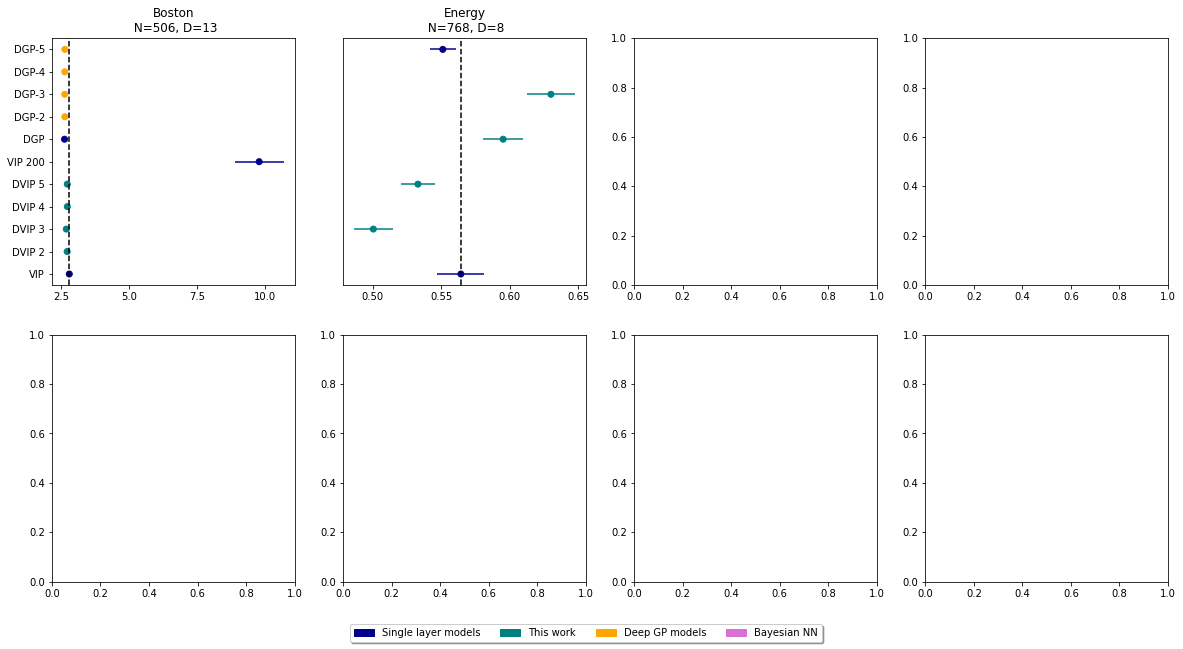

In [56]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
comparative_plot(models, 
                 np.concatenate([boston.xs(('NLL', 'mean'),axis=1).to_numpy(),  boston_200.xs(('NLL', 'mean'),axis=1).to_numpy(), doubly.xs(('NLL', 'mean'),axis=1).to_numpy(),]),
                 np.concatenate([boston.xs(('NLL', 'std'),axis=1).to_numpy(),  boston_200.xs(('NLL', 'std'),axis=1).to_numpy(), doubly.xs(('NLL', 'std'),axis=1).to_numpy(),]),
                 ["darkblue", "teal", "teal", "teal", "teal", "darkblue", "darkblue", "darkorange", "darkorange", "darkorange", "darkorange"],
                 ax[0][0])
ax[0][0].set_title("Boston\n N=506, D=13")
ax[0][0].locator_params(axis="x", nbins=4)
comparative_plot(models[:6], 
                 np.concatenate([energy.xs(('RMSE', 'mean'),axis=1).to_numpy(),  energy_200.xs(('RMSE', 'mean'),axis=1).to_numpy()]),
                 np.concatenate([energy.xs(('RMSE', 'std'),axis=1).to_numpy(),  energy_200.xs(('RMSE', 'std'),axis=1).to_numpy()]),
                 ["darkblue", "teal", "teal", "teal", "teal", "darkblue"],
                 ax[0][1])
ax[0][1].yaxis.set_ticklabels([])
ax[0][1].tick_params(left = False)
ax[0][1].set_title("Energy\n N=768, D=8")
ax[0][1].locator_params(axis="x", nbins=4)

handles = [
    Circle.Patch(color='darkblue', label='Single layer models'),
    Circle.Patch(color='teal', label='This work'),
    Circle.Patch(color='darkorange', label='Deep GP models'),
    Circle.Patch(color='orchid', label='Bayesian NN'),
]


ax[1][1].legend(loc='upper center', bbox_to_anchor=(1, -0.15),
          fancybox=True, shadow=True, ncol=5, handles = handles)

plt.show()